In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,10)

# 1 Mean-Shift and K-Means

## 1.1 Mean-Shift

### (a) Implementation of Epanechnikov

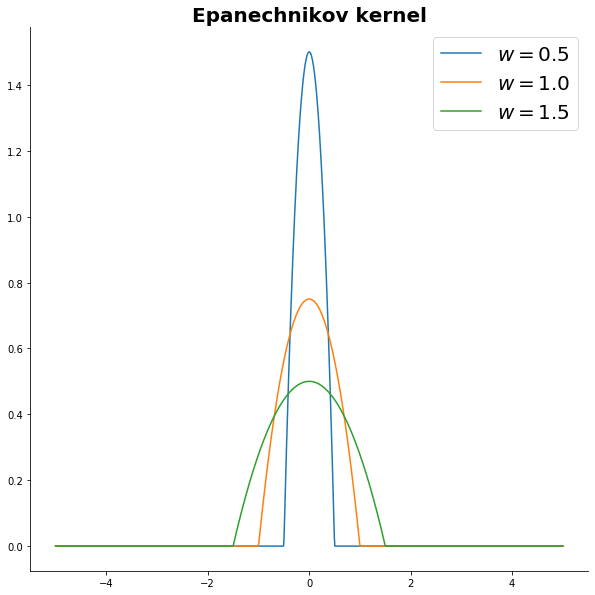

In [12]:
def epanechnikov(x, m, w):  # kernel function
    supp = abs((x-m)/w) < 1
    k = 3/(4*w) * (1 - ((x-m)/w)**2)
    return k * supp

x = np.linspace(-5, 5, 1000)
plt.plot(x, epanechnikov(x, 0, 0.5), label=r"$w=0.5$")
plt.plot(x, epanechnikov(x, 0, 1.0), label=r"$w=1.0$")
plt.plot(x, epanechnikov(x, 0, 1.5), label=r"$w=1.5$")
plt.legend(fontsize=20)
plt.title("Epanechnikov kernel", fontsize=20, fontweight="bold")
sns.despine()

### (b) Mean-shift on a 1d data set

#### i) Implementation

In [3]:
def mean_shift(data, T):
    ## store all of datapoints sequences after updating 
    updated_data = np.zeros((T + 1, len(data)))
    updated_data[0] = data; # Initialized datapoints in time zero
    
    ## update each datapoint in time sequence T
    for t in range(1, T + 1):
        for j in range(0, len(data)):  # calculate the updating datapoint j
            count = 0
            sum_data_i = 0.0
            for i in range(0, len(data)):
                if abs(data[i] - data[j]) < 1:
                    count = count + 1
                    sum_data_i = sum_data_i + data[i]
            data[j] = sum_data_i / count
            updated_data[t][j] = data[j] 
        
    return updated_data

#### ii) Visualization

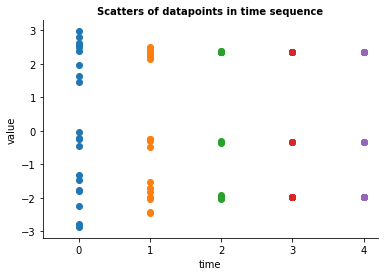

In [4]:
datasets = np.load("meanshift1d.npy")
Time_sequence = np.arange(0, 4)  # number of steps
updated_data = mean_shift(datasets, len(Time_sequence))  # with the size of 6×20

for t in range(0, len(Time_sequence) + 1):
    plt.scatter(np.ones((len(datasets)))*t, updated_data[t])
plt.xlabel("time", fontsize=10)
plt.ylabel("value", fontsize=10)
plt.title("Scatters of datapoints in time sequence", fontsize=10, fontweight='bold')
plt.xlim((-0.5, 4.2))
sns.despine()

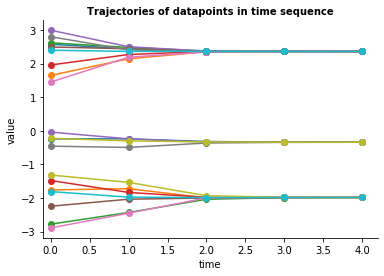

In [5]:
for data in updated_data.T:
    plt.plot(np.arange(0, 5), data, 'o-')
plt.xlabel("time", fontsize=10)
plt.ylabel("value", fontsize=10)
plt.title("Trajectories of datapoints in time sequence", fontsize=10, fontweight='bold')
plt.xlim((-0.1, 4.2))
sns.despine()

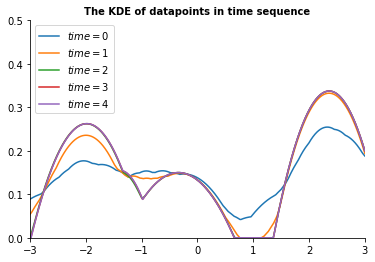

In [6]:
def kde(x, mu, w=1):
    return sum([epanechnikov(x, m, w) for m in mu],0) / len(mu)
x = np.linspace(-3, 3, 1000)

plt.plot(x, kde(x, updated_data[0], 1), label=r"$time=0$")
plt.plot(x, kde(x, updated_data[1], 1), label=r"$time=1$")
plt.plot(x, kde(x, updated_data[2], 1), label=r"$time=2$")
plt.plot(x, kde(x, updated_data[3], 1), label=r"$time=3$")
plt.plot(x, kde(x, updated_data[4], 1), label=r"$time=4$")
plt.legend(fontsize=10)
plt.title("The KDE of datapoints in time sequence", fontsize=10, fontweight='bold')
plt.xlim((-3, 3))
plt.ylim((0, 0.5))
sns.despine()

## 1.2 K-Means

### (b) Implement and apply to 2d data set

600


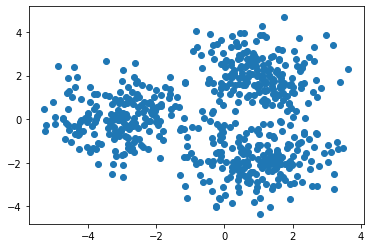

In [7]:
init_data = np.load("kmeans2d.npy")  # with the size of 2×600
init_data = init_data.T
print(init_data.shape[0])
plt.scatter(init_data[:,0], init_data[:,1])

In [8]:
def kmeans(data, k):
    centers = np.random.randn(k, 2)  # select k original centers randomly
    centers_new = np.zeros((k, 2))  # initialize the new centers
    for iter in range(100):
        distance= np.zeros((k, data.shape[0]))
        for i in range(0, k):
            for j in range(0, data.shape[0]):
                distance[i][j] = np.linalg.norm(data[j] - centers[i])
            
        label = distance.argmin(axis=0)  ## size of 1×600
        ## update the centers
        
        for k_ in range(k):
            count = 0
            for label_ in range(len(label)):
                if label[label_] == k:
                    count = count + 1
                    centers_new[k_] = centers_new[k_] + data[label_]
            if(count == 0):
                centers_new[k_] = centers[k_]
            else:
                centers_new[k_] = centers_new[k_] / count
        centers = centers_new
    return label, centers

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1
 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 1 0 2 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 1 2 2 2 2 1 2 2 

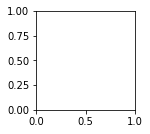

In [10]:
plt.subplot(2, 3, 1)
label, centers= kmeans(init_data, 3)
print(label)
#plt.scatter(centers[:,0], centers[:,1], c = 'r', s = 100, alpha = 0.5)


# 2 K-Nearest Neighbors

#### (a) Implementation

In [5]:
data = np.load("knn2d.npy")  # with the size of 2×400
label = np.load("knn2dlabels.npy")
label = label.T
 
## split the data into 5 parts
data1 = data[:,:int(data.shape[1]/5)]
data2 = data[:,int(data.shape[1]/5):2*int(data.shape[1]/5)]
data3 = data[:,2*int(data.shape[1]/5):3*int(data.shape[1]/5)]
data4 = data[:,3*int(data.shape[1]/5):4*int(data.shape[1]/5)]
data5 = data[:,4*int(data.shape[1]/5):5*int(data.shape[1]/5)]

In [6]:
## definite k-NN
def knn(data_train, data_test, label, k, ite_round): # "ite_round" means the round of cross-validation
    data_train = data_train.T
    data_test = data_test.T
    label_test = []  # Initialize the testing label
    
    ## calculate the L2 Norm for each test datapoints towards traning set
    for data_test_i in data_test:
        distance = []
        for data_train_i in data_train:
            distance.append(np.linalg.norm(data_test_i - data_train_i)) 
        sort_index = np.argsort(distance)  # sort by ascent order
        
        ## select k nearest neighbors and their labels
        k_neighbors_labels = []
        for i in sort_index[:k]:
            k_neighbors_labels.append(label[i])

        count_0 = 0
        count_1 = 0
        for i in k_neighbors_labels:
            if i == 0: count_0 = count_0 + 1
            else: count_1 = count_1 + 1
        if(count_0 > count_1): label_test.append(0)
        else: label_test.append(1)
    
    """
    Compare the label in test set with the corresponding value in original data,
    and calculate the accuracy 
    """
    label_ = label[ite_round*int(data.shape[1]/5):(ite_round*int(data.shape[1]/5) + int(data.shape[1]/5))]
    count = 0
    for i in range(0, len(label_test)):
            if label_test[i] == label_[i]:
                count = count + 1
    accuracy = count / len(label_test)
    return accuracy

#### (b) Choosing K via cross-validation.

My choice is 21 neighbors


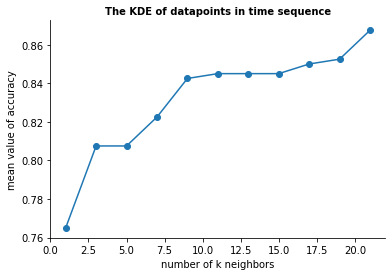

In [13]:
## Cross Validation
k = np.arange(1, 23, 2)  # k from 1 to 21
accuracy_mean = []
for k_ in k:
    train_data1 = np.concatenate((data2, data3, data4, data5), axis=1)
    accuracy1 = knn(train_data1, data1, label, k_, 0)
    
    train_data2 = np.concatenate((data1, data3, data4, data5), axis=1)
    accuracy2 = knn(train_data2, data2, label, k_, 1)
    
    train_data3 = np.concatenate((data1, data2, data4, data5), axis=1)
    accuracy3 = knn(train_data3, data3, label, k_, 2)
    
    train_data4 = np.concatenate((data1, data2, data3, data5), axis=1)
    accuracy4 = knn(train_data4, data4, label, k_, 3)
    
    train_data5 = np.concatenate((data1, data2, data3, data4), axis=1)
    accuracy5 = knn(train_data5, data5, label, k_, 4)
    
    accuracy_mean.append((accuracy1 + accuracy2 + accuracy3 + accuracy4 + accuracy5)/5)

plt.plot(k, accuracy_mean, 'o-')
plt.title("The KDE of datapoints in time sequence", fontsize=10, fontweight='bold')
plt.xlabel("number of k neighbors")
plt.ylabel("mean value of accuracy")
sns.despine()
print("My choice is 21 neighbors")